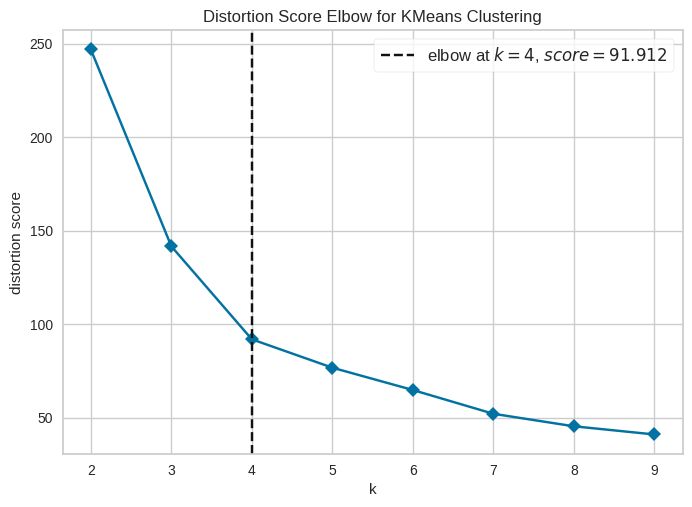

Silhouette Score for K-Means: 0.4303


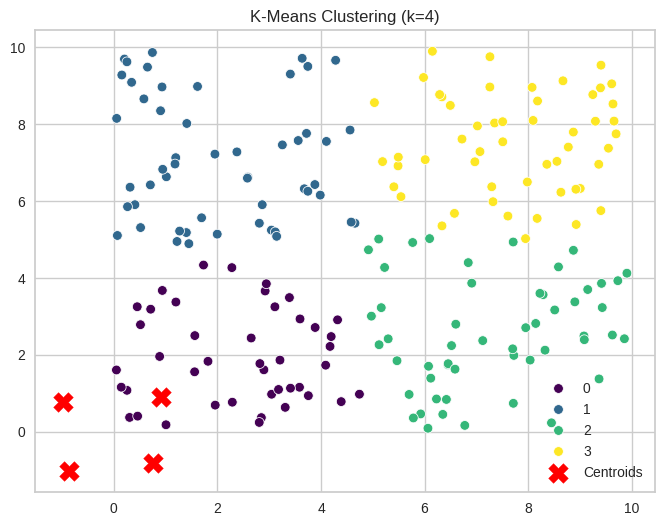

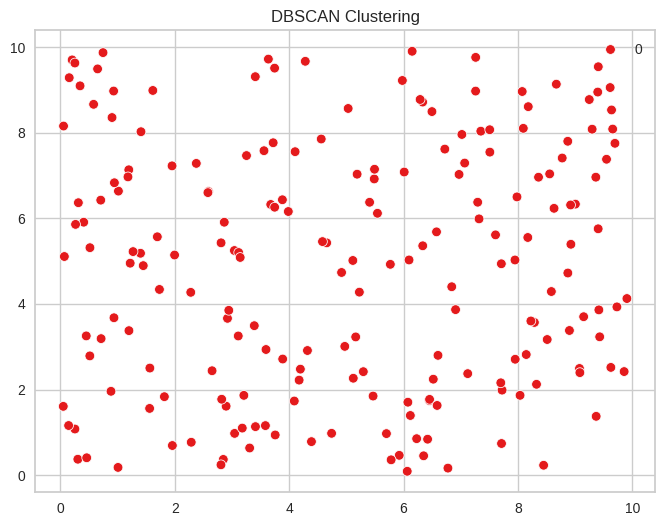

Clustering analysis completed successfully!


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
X = np.random.rand(200, 2) * 10

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10), metric='distortion', timings=False)
visualizer.fit(X_scaled)
visualizer.show()

k_optimal = visualizer.elbow_value_
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_avg:.4f}')

plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=kmeans_labels, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title(f'K-Means Clustering (k={k_optimal})')
plt.legend()
plt.show()

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=dbscan_labels, palette='Set1')
plt.title('DBSCAN Clustering')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans_pca = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(X_pca)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_pca_labels, palette='coolwarm')
plt.title('K-Means Clustering after PCA')
plt.show()

print("Clustering analysis completed successfully!")
